<a href="https://colab.research.google.com/github/tanyasosa/SeriesDeTiempo_TSC_A01177961/blob/main/Oficial_tipo_de_cambio_TSC_A01177961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## Tanya Sosa Cavazos A01177961
### Tipo de cambio
#### Marzo 10, 2023


In [1]:
# importamos las librerias de siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [4]:
procesos=pd.read_csv('/content/MXN=X.csv')

In [5]:
procesos.head()

,Date,tipo_cambio
0,6/21/22,20.268499
1,6/22/22,20.136999
2,6/23/22,20.049500
3,6/24/22,20.009899
4,6/27/22,19.892559


Graficamos el proceso de Tipo de cambio

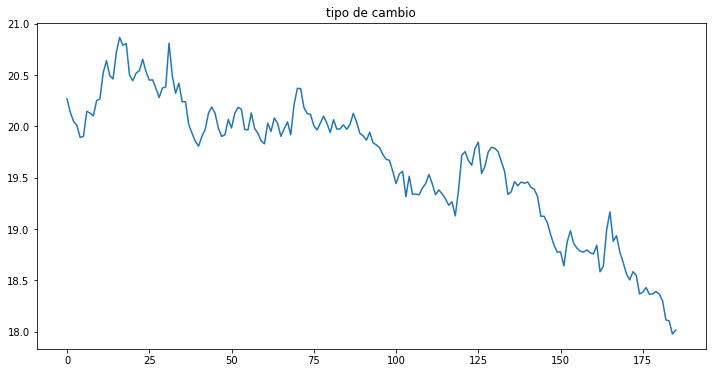

In [6]:
# figsize=( 12,6)
procesos['tipo_cambio'].plot()
plt.title('tipo de cambio')
plt.show()

**El tipo de cambio no es estacionario**
El tipo de cambio no es estacionario ya que la inflación, el crecimeinto economico, tasas de interes, etc, son factores que influyen ya sea en el aumento o disminuyo de valor de la moneda.
El tipo de cambio es considerado una caminata aleatoria ya que no se puede predecir.

El prónostico de la serie lo vamos a realizar en varios pasos:
1. Graficar la serie
2. Realizar la prueba de raices unitarias para verificar que el proceso sea estacionario
3. Si el proceso no es estacionario, lo hacemos estacionario. Si ya es estacionario procedemos al siguiente paso
4. Identificar qué tipo de proceso estacionario es
5. Identificado el proceso, realizar el pronóstico de la serie

## **Tipo de cambio**

In [54]:
# importamos la base de datos
tipo_cambio = pd.read_csv('/content/MXN=X.csv')

In [55]:
# vemos el dataframe
tipo_cambio.tail()

,Date,tipo_cambio
181,3/1/23,18.300940
182,3/2/23,18.115971
183,3/3/23,18.105301
184,3/6/23,17.978001
185,3/7/23,18.015200


In [56]:
# importamos la base de datos
tipo_cambio = pd.read_csv('/content/MXN=X.csv', index_col='Date', parse_dates=True )

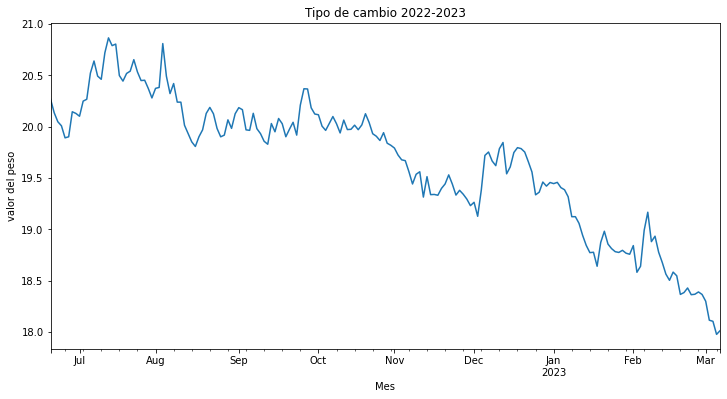

In [57]:
# comenzamos graficando la serie
# titulo y nombre a ejes
tipo_cambio['tipo_cambio'].plot();
plt.ylabel('valor del peso')
plt.xlabel('Mes')
plt.title('Tipo de cambio 2022-2023')
plt.show()

In [10]:
## vamos a verificar que la serie sea estacionaria
## Dickey Fuller Aumentada (Aumented Dickey fuller)
result_adf = adfuller(tipo_cambio)
print('p-value: %.2f' % result_adf[1])

p-value: 0.98


Recuerde que

 **$H_0:$ serie No estacionaria**

 **$H_a:$ serie estacionaria**

regla de decisión si el p-valor$< \alpha $ entonces rechazar $H_0$

con un $\alpha=0.05$

conclusión: 0.98>0.05, No rechazamos H0, el tipo de cambio es un proceso no estacionario





**¿Cómo diferenciar una serie?**

In [11]:
# diferenciar serie
tipo_cambio['tipo_diff'] = tipo_cambio['tipo_cambio'].diff()

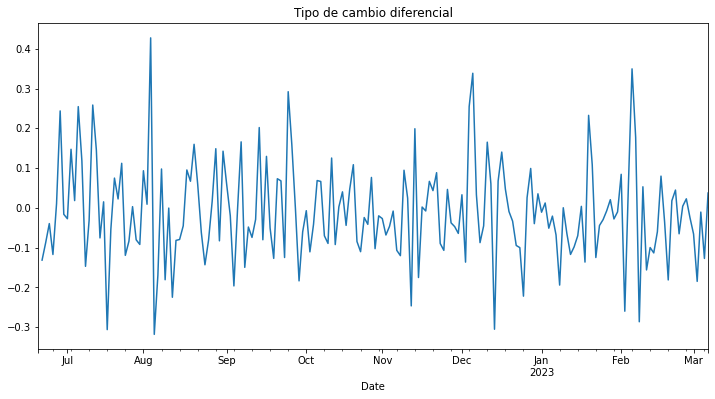

In [12]:
# graficamos esta nueva serie
tipo_cambio['tipo_diff'].plot()
plt.title('Tipo de cambio diferencial')
plt.show()


Para determinar que tipo de proceso es recurriremos:

* Funcion de autocorrelación ACF
* Funcion de autocorrelación Parcial PACF

Realizamos la prueba de raices unitaria

In [14]:
result_adf = adfuller(tipo_cambio['tipo_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


Conclusión
Pvalue=0.00<0.05, rechazamos H0, La serie diferenciada ahora es estacionaria

In [13]:
tipo_cambio

,tipo_cambio,tipo_diff
Date,,
2022-06-21,20.268499,NaN
2022-06-22,20.136999,-0.131500
2022-06-23,20.049500,-0.087499
2022-06-24,20.009899,-0.039601
2022-06-27,19.892559,-0.117340
...,...,...
2023-03-01,18.300940,-0.065959
2023-03-02,18.115971,-0.184969
2023-03-03,18.105301,-0.010670


si la serie es estacionaria, tratamos de identificar que proceso es para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial

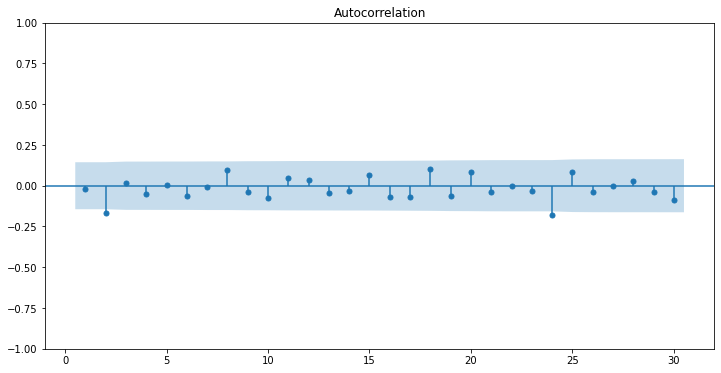

In [15]:
#plot_acf(serie, zero=False, lags=30);
plot_acf(tipo_cambio['tipo_diff'].dropna(),zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


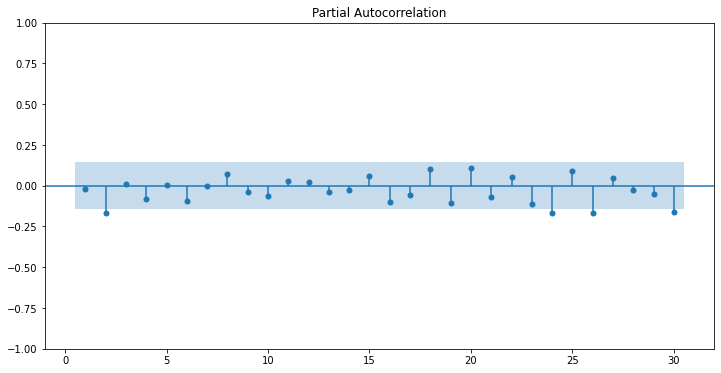

In [16]:
# autocorrelación parcial PACF
plot_pacf(tipo_cambio['tipo_diff'].dropna(), zero=False, lags=30);

Comentarios

In [18]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(tipo_cambio['tipo_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, f

AR: 0, MA: 2
AR: 0, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 1, MA: 2
AR: 1, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 2, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0  -247.354601 -240.913889
   1  -245.439253 -235.778186
   2  -249.543075 -236.661651
   3  -247.589465 -231.487686
   4  -246.464787 -227.142652
1  0  -245.411245 -235.750177
   1  -247.840834 -234.959411
   2  -247.691484 -231.589704
   3  -245.942115 -226.619980
   4  -244.581463 -222.038973
2  0  -248.584608 -235.703185
   1  -246.917396 -230.815617
   2  -246.542992 -227.220857
   3  -245.104183 -222.561692
   4  -243.173624 -217.410778
3  0  -246.611752 -230.509973
   1  -245.410147 -226.088012
   2  -245.344357 -222.801866
   3  -246.445684 -220.682837
   4  -243.003070 -214.019867
4  0  -245.896105 -226.573970
   1  -243.895032 -221.352541
   2  -242.757772 -216.994926
   3  -243.904333 -214.921131
   4  -243.594547 -211.390989

vamos a elegir el modelo que tiene "mejor" c riterio de Akaike (AIC). el valor más pequeño

In [19]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
0  2  -249.543075 -236.661651
2  0  -248.584608 -235.703185
1  1  -247.840834 -234.959411
   2  -247.691484 -231.589704
0  3  -247.589465 -231.487686
   0  -247.354601 -240.913889
2  1  -246.917396 -230.815617
3  0  -246.611752 -230.509973
2  2  -246.542992 -227.220857
0  4  -246.464787 -227.142652
3  3  -246.445684 -220.682837
1  3  -245.942115 -226.619980
4  0  -245.896105 -226.573970
0  1  -245.439253 -235.778186
1  0  -245.411245 -235.750177
3  1  -245.410147 -226.088012
   2  -245.344357 -222.801866
2  3  -245.104183 -222.561692
1  4  -244.581463 -222.038973
4  3  -243.904333 -214.921131
   1  -243.895032 -221.352541
   4  -243.594547 -211.390989
2  4  -243.173624 -217.410778
3  4  -243.003070 -214.019867
4  2  -242.757772 -216.994926

El criterio de Akaike (AIC) y el criterio bayesiano de información (BIC) nos sirve para elegir el modelo adecuado. 
Elegir solo uno, BIC o AIC.


Ente mas grande es el AIC/BIC es un peor modelo.

de acuerdo con el criterio 

el mejor modelo segun AIC es ARMA(4,4)

el modelo  estimar AR(2)

In [30]:
modelo1 = ARIMA(tipo_cambio['tipo_cambio'].dropna(), order=(0, 1, 2)) ##AR(2)
resultado1 = modelo1.fit() # calcula
print(resultado1.summary() )  #muestra

                               SARIMAX Results                                
Dep. Variable:            tipo_cambio   No. Observations:                  186
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 127.402
Date:                Fri, 10 Mar 2023   AIC                           -248.804
Time:                        13:37:38   BIC                           -239.143
Sample:                    06-21-2022   HQIC                          -244.888
                         - 03-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0012      0.063      0.019      0.984      -0.123       0.125
ma.L2         -0.1822      0.073     -2.493      0.013      -0.325      -0.039
sigma2         0.0148      0.001     11.198      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [31]:
##realizamos pronóstico
tipo_cambio['tipo_pronosticada'] = resultado1.predict()


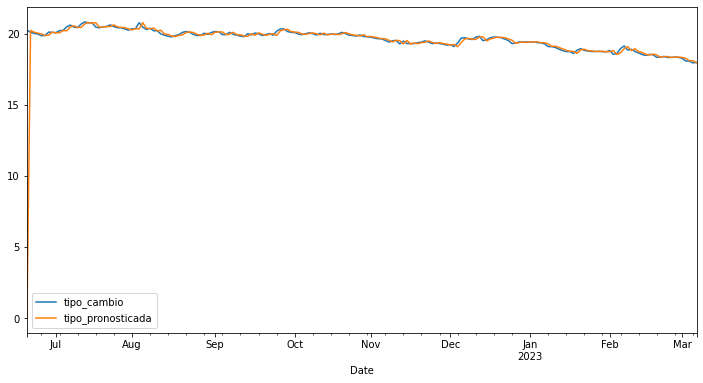

In [32]:
tipo_cambio[['tipo_cambio', 'tipo_pronosticada']].plot();

In [33]:
resultado1.predict(229,232)

2023-05-08    18.038628
2023-05-09    18.038628
2023-05-10    18.038628
2023-05-11    18.038628
Freq: B, Name: predicted_mean, dtype: float64

El modelo pronostica que para el 08 de mayo del 2023 el dolar tendra un valor de 18.038628. 

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
